In [38]:
# Nama: Rayyan Ramanda
# NIM: 1103200202

K-means merupakan salah satu algoritma yang bersifat unsupervised learning. K-Means memiliki fungsi untuk mengelompokkan data kedalam data cluster.

In [1]:
#Melakukan import library
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path menuju file CSV
file_path = '/content/drive/My Drive/Mall_Customers.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


EDA

In [3]:
# Menampilkan informasi dasar tentang DataFrame
print("Informasi Dasar DataFrame:")
print(df.info())

# Menampilkan jumlah baris dan kolom
jumlah_baris, jumlah_kolom = df.shape
print(f"\n\nJumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")


Informasi Dasar DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Jumlah Baris: 200
Jumlah Kolom: 5


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# Membuang kolom yang tidak diperlukan
df = df.drop('CustomerID', axis=1)

# Menampilkan DataFrame setelah menghapus kolom
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


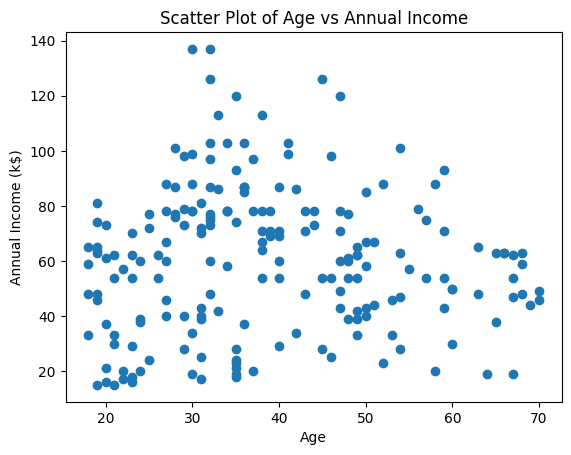

In [6]:
import matplotlib.pyplot as plt

# Memvisualisasikan data dengan scatter plot
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.title('Scatter Plot of Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


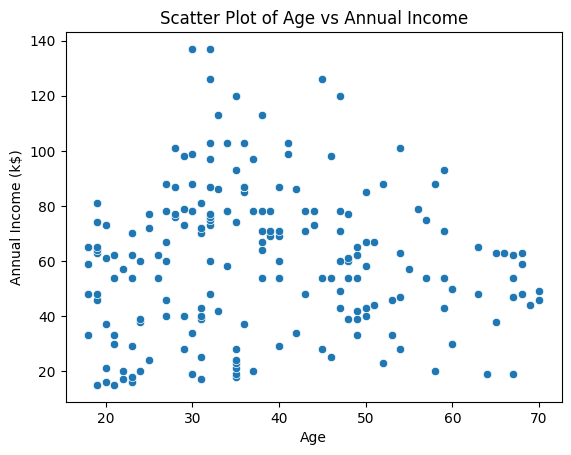

In [7]:
import seaborn as sns

# Memvisualisasikan data dengan scatter plot menggunakan Seaborn
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.title('Scatter Plot of Age vs Annual Income')
plt.show()


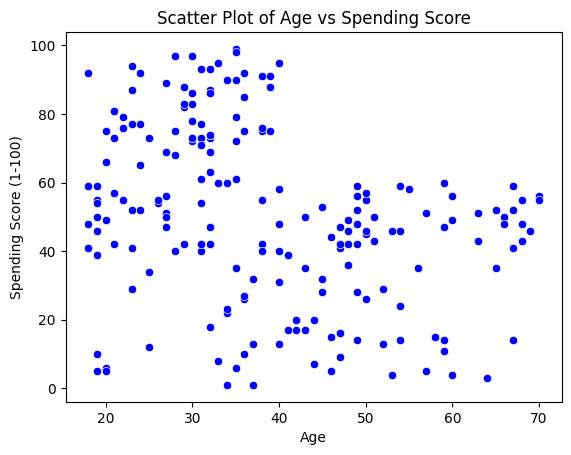

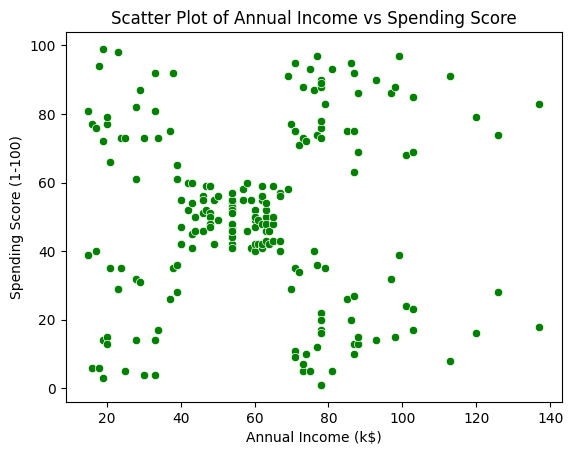

In [13]:
import seaborn as sns

# Scatter plot Age vs Spending Score menggunakan Seaborn
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, color='blue')
plt.title('Scatter Plot of Age vs Spending Score')
plt.show()

# Scatter plot Annual Income vs Spending Score menggunakan Seaborn
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='green')
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.show()


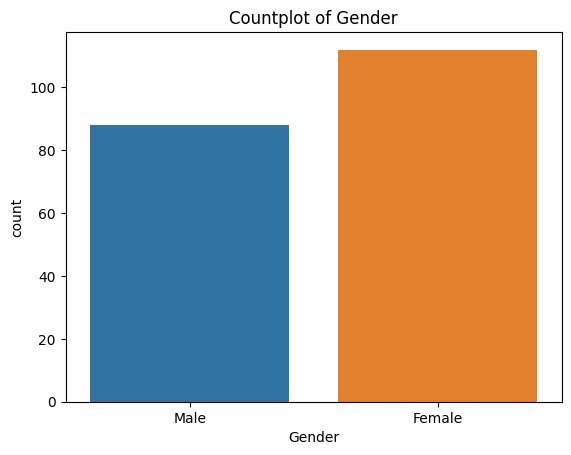

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat countplot untuk gender
sns.countplot(x='Gender', data=df)
plt.title('Countplot of Gender')
plt.show()


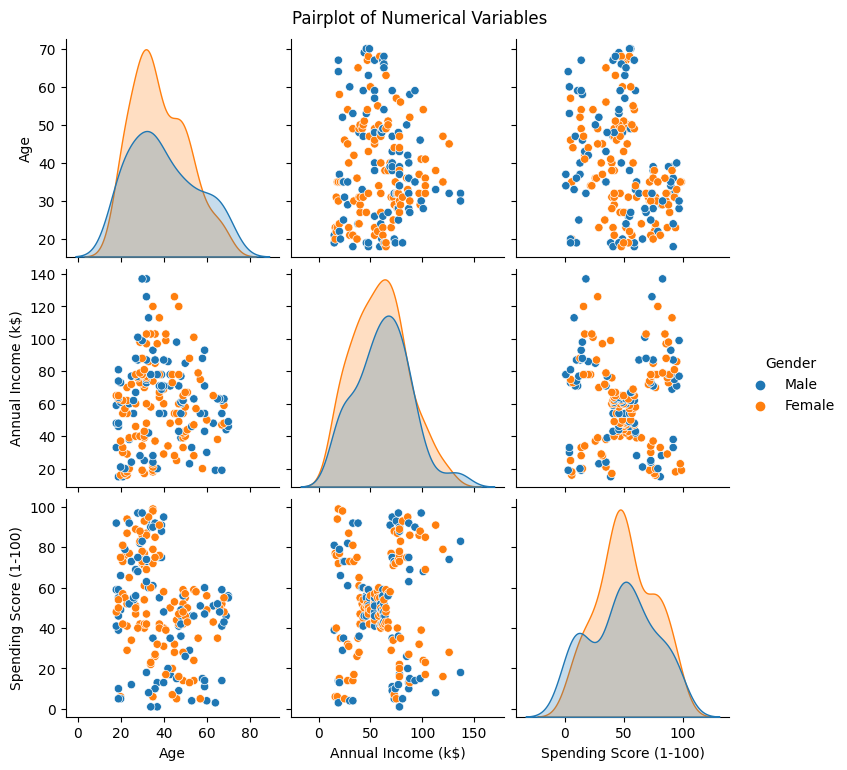

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat pairplot dari beberapa variabel numerik
sns.pairplot(df, hue='Gender')
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

In [25]:
# Memisahkan dataset dan memfokuskan pada kolom Age dan Spending Score
focused_df = df[['Age', 'Spending Score (1-100)']]

# Menampilkan beberapa baris pertama dari DataFrame yang difokuskan
print(focused_df.head())


   Age  Spending Score (1-100)
0   19                      39
1   21                      81
2   20                       6
3   23                      77
4   31                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

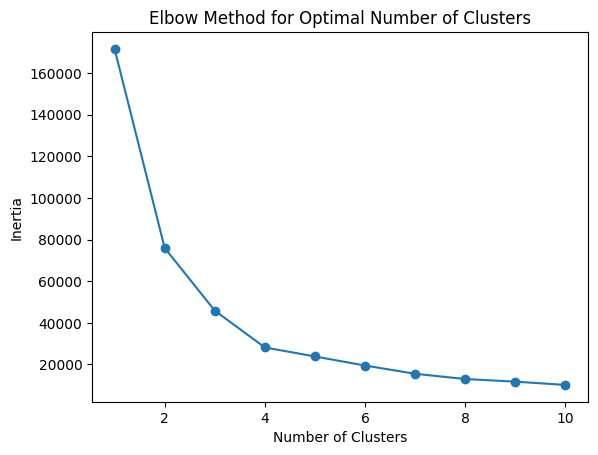

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memilih kolom yang akan digunakan untuk klustering
data_for_clustering = df[['Age', 'Spending Score (1-100)']]

# Menyimpan nilai inersia untuk setiap jumlah kluster
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)

# Menggambar grafik elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [36]:
from sklearn.cluster import KMeans

# Menentukan jumlah kluster yang optimal (contoh: 3)
n_clusters = 3

# Memilih kolom yang akan digunakan untuk klustering
data_for_clustering = df[['Age', 'Spending Score (1-100)']]

# Membuat dan melatih model k-means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_for_clustering)

# Menambahkan kolom kluster ke dalam DataFrame
df['Cluster'] = kmeans.labels_

# Menampilkan beberapa baris pertama dari DataFrame dengan kolom kluster
print(df.head())


   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        0
1    Male   21                  15                      81        2
2  Female   20                  16                       6        1
3  Female   23                  16                      77        2
4  Female   31                  17                      40        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


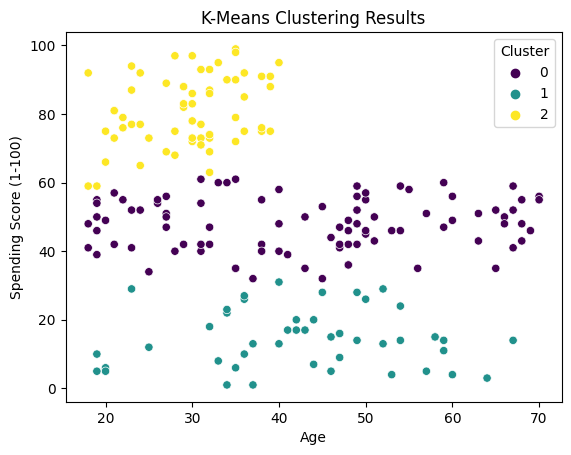

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Memvisualisasikan hasil klustering dengan scatter plot
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering Results')
plt.show()
